<h3> Wallmart Retail Sales Anaysis</h3>
<p>One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.
<p>Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is the dataset covers observatory sales from 2010-02-05 to 2012-11-01. The total observations are 6435 with 8 columns. The dataset has the following fields:

<li>Store - the store number
<li>Date - the week of sales
<li>Weekly_Sales - sales for the given store
<li>Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
<li>Temperature - Temperature on the day of sale
<li>Fuel_Price - Cost of fuel in the region
<li>CPI – Prevailing consumer price index
<li>Unemployment - Prevailing unemployment rate

In [2]:
# read csv data set
wallmart_data = pd.read_csv('./Dataset/Walmart_Store_sales.csv')
wallmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
# Since, Date is object data type convert it to DateTime.
wallmart_data.Date = pd.to_datetime(wallmart_data.Date)
wallmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
# Have a look at dataset
wallmart_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
# Check dataset size.
wallmart_data.shape

(6435, 8)

In [6]:
# checking for missing values
wallmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There's no null data thus, we can proceed further to analyse the data and question the data set.
<h3>Data Analysis</h3>
<ol><li>Which store has maximum sales
<li>Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
<li>Which store/s has good quarterly growth rate in Q3’2012
<li>Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
<li>Provide a monthly and semester view of sales in units and give insights</ol>

<h4>Sales analysis by store</h4>

Text(0.85, 0.97, 'Maximum sales, sales = 301397792.46')

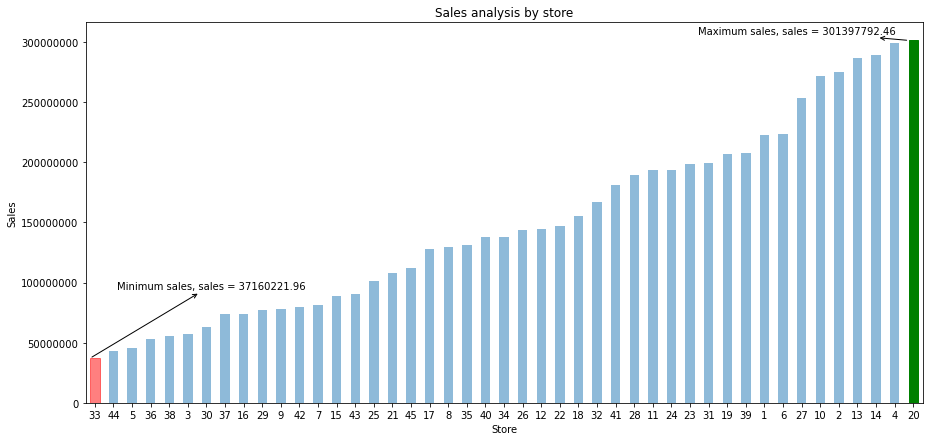

In [7]:
# sum 'weekly_sales' by 'store' and sort values in ascending order.
stores_sales = wallmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values()

# plot stores sales
ax = stores_sales.plot(kind='bar', figsize=(15,7), alpha=0.5)

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Sales analysis by store')
plt.xlabel('Store')
plt.ylabel('Sales')

# label store with minimum sales.
minimum = ax.patches[0]
minimum.set_alpha(0.5)
minimum.set_color('r')
ax.annotate("Minimum sales, sales = {0:.2f}".format((minimum.get_height())), 
            xy=(minimum.get_x(), minimum.get_height()),
            xytext=(0.15, 0.3), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
            horizontalalignment='center')

# label store with maximum sales.
maximum = ax.patches[len(ax.patches) - 1]
maximum.set_alpha(1)
maximum.set_color('g')
ax.annotate("Maximum sales, sales = {0:.2f}".format((maximum.get_height())), 
            xy=(maximum.get_x(), maximum.get_height()),
            xytext=(0.85, 0.97), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
            horizontalalignment='center')

<h4><li>Which store has maximum sales?</h4>
The store with the maximum sales can be observed as 33 and 20 respectively.

<h4>Variation in sales by stores</h4>

Text(0.85, 0.97, 'Maximum sales variation =  317570')

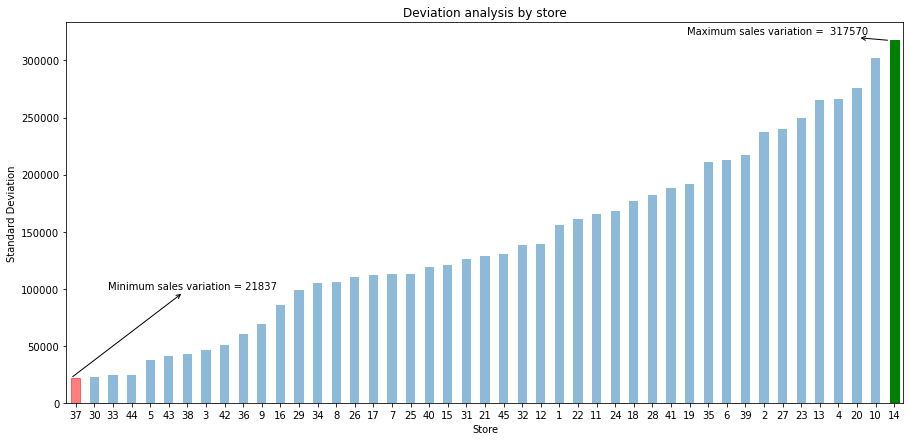

In [8]:
# get standard deviation by stores.
stores_sales_variation = wallmart_data.groupby('Store')['Weekly_Sales'].std().sort_values()

# plot variation in sales
ax = stores_sales_variation.plot(kind='bar', figsize=(15,7), alpha=0.5)

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Deviation analysis by store')
plt.xlabel('Store')
plt.ylabel('Standard Deviation')

# label store with minimum sales.
minimum = ax.patches[0]
minimum.set_alpha(0.5)
minimum.set_color('r')
ax.annotate("Minimum sales variation = {0:.0f}".format((minimum.get_height())), 
            xy=(minimum.get_x(), minimum.get_height()),
            xytext=(0.15, 0.3), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
            horizontalalignment='center')

# label store with maximum sales.
maximum = ax.patches[len(ax.patches) - 1]
maximum.set_alpha(1)
maximum.set_color('g')
ax.annotate("Maximum sales variation =  {0:.0f}".format((maximum.get_height())), 
            xy=(maximum.get_x(), maximum.get_height()),
            xytext=(0.85, 0.97), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
            horizontalalignment='center')

<h4><li>Which store has maximum standard deviation i.e., the sales vary a lot.</h4>
Above charts visualizes the variation in store sales. The store with the minimum and maximum variation can be observed as 37 and 14 respectively with corresponding standard deviations (rounded) of 21837 and 317570 respectively.

Text(0.85, 0.94, 'Maximum coefficient = 0.23')

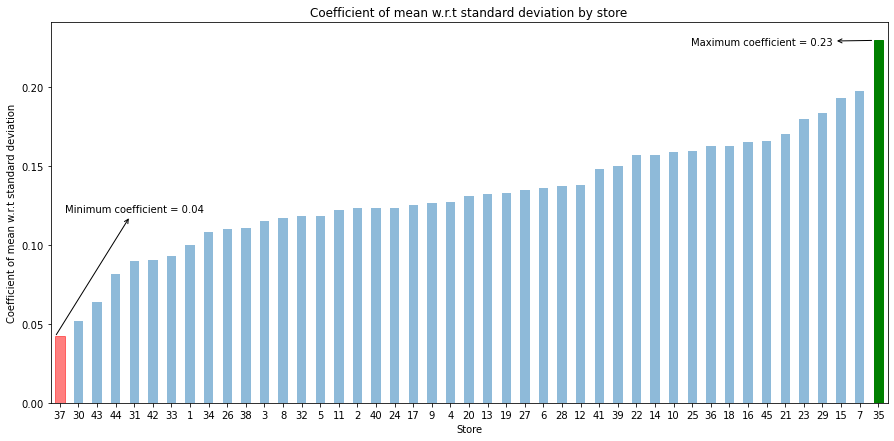

In [9]:
# Find out the coefficient of mean w.r.t standard deviation
grouped_by_store = wallmart_data.groupby('Store')
coef_mean_std = grouped_by_store['Weekly_Sales'].std() / grouped_by_store['Weekly_Sales'].mean()
coef_mean_std = coef_mean_std.sort_values()

# plot data
ax = coef_mean_std.plot(kind='bar', figsize=(15,7), alpha=0.5)

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Coefficient of mean w.r.t standard deviation by store')
plt.xlabel('Store')
plt.ylabel('Coefficient of mean w.r.t standard deviation')

# label store with minimum coefficient of variation.
minimum = ax.patches[0]
minimum.set_alpha(0.5)
minimum.set_color('r')
ax.annotate("Minimum coefficient = {0:.2f}".format((minimum.get_height())), 
            xy=(minimum.get_x(), minimum.get_height()),
            xytext=(0.1, 0.5), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
            horizontalalignment='center')

# label store with maximum coefficient of variation.
maximum = ax.patches[len(ax.patches) - 1]
maximum.set_alpha(1)
maximum.set_color('g')
ax.annotate("Maximum coefficient = {0:.2f}".format((maximum.get_height())), 
            xy=(maximum.get_x(), maximum.get_height()),
            xytext=(0.85, 0.94), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),
            horizontalalignment='center')

<h4><li>Find out the coefficient of mean to standard deviation</h4>
Above chart visualizes the coefficient of variation of store sales. The store with the minimum and maximum coefficient can be observed as 37 and 35 respectively with corresponding standard deviations (rounded) of 0.04 and 0.23 respectively. This signifies that the mean and standard deviation of store 37 varies a lot. Let's further take a look at sales distribution for store 37.

Mean and standard deviation for store 35 sales are 919724.979580419 and 211243.4577914686and respectively.


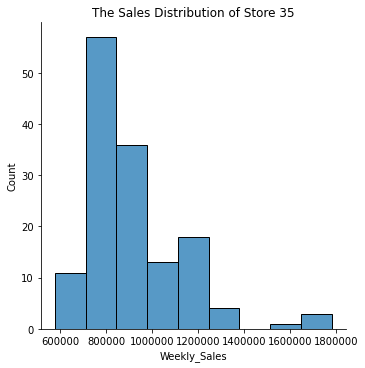

In [10]:
# Distribution for store 37
max_cv_store_data = wallmart_data[wallmart_data['Store'] == 35]['Weekly_Sales']
sns.displot(max_cv_store_data, bins=9)
plt.title('The Sales Distribution of Store 35')
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
print("Mean and standard deviation for store 35 sales are "+ str(max_cv_store_data.mean()) + 
      " and " + str(max_cv_store_data.std()) +"and respectively.")

<h4>Sales analysis by month, quarter and semester of an year</h4>

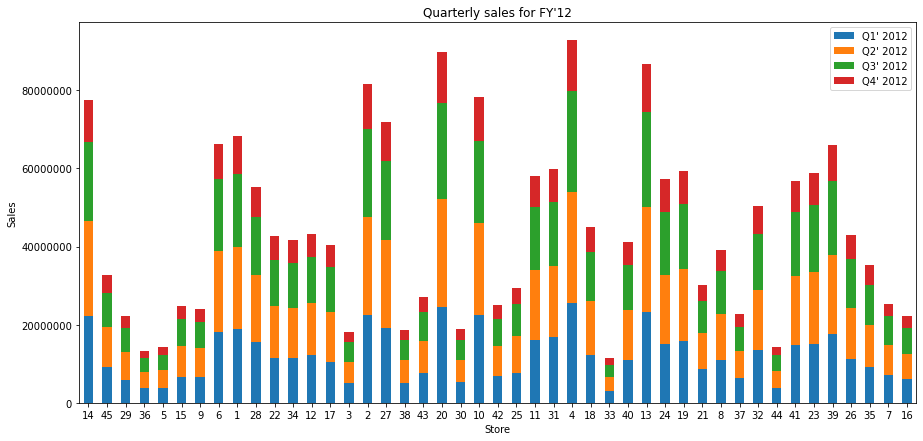

In [11]:
# quarterly sales analysis for FY'12
quarterly_sales = pd.DataFrame()
fy12_sales = wallmart_data.groupby(wallmart_data.Date.dt.year).get_group(2012)

# considering 1st quarter to be Apr-May-June
quarterly_sales['Q1'] = fy12_sales[fy12_sales.Date.dt.month.isin([1,2,3])].groupby('Store')['Weekly_Sales'].sum()
quarterly_sales['Q2'] = fy12_sales[fy12_sales.Date.dt.month.isin([4,5,6])].groupby('Store')['Weekly_Sales'].sum()
quarterly_sales['Q3'] = fy12_sales[fy12_sales.Date.dt.month.isin([7,8,9])].groupby('Store')['Weekly_Sales'].sum()
quarterly_sales['Q4'] = fy12_sales[fy12_sales.Date.dt.month.isin([10,11,12])].groupby('Store')['Weekly_Sales'].sum()

# sorting by growth
quarterly_sales['Q3 Growth'] = (quarterly_sales['Q3']-quarterly_sales['Q2'])*100/quarterly_sales['Q3']

# plot data
ax = quarterly_sales.sort_values(by='Q3 Growth').plot(kind='bar', figsize=(15,7), stacked=True)

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title("Quarterly sales for FY'12")
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend(["Q1' 2012", "Q2' 2012", "Q3' 2012", "Q4' 2012"])

<h4><li>Which store/s has good quarterly growth rate in Q3’2012</h4>
From the above visualization it can be clearly seen that the sales are consistently falling w.r.t quarters. Although, stores like store <b>16, 7, 35 and 39</b> have performed good as compared to other stores. <br>Q4 sales are not proper insights as the <b>data for month of december 2012 is not complete.</b>

Increase in sales in semester-II FY'11 7.54
Decrease in sales in semester-II FY'12 -2.74


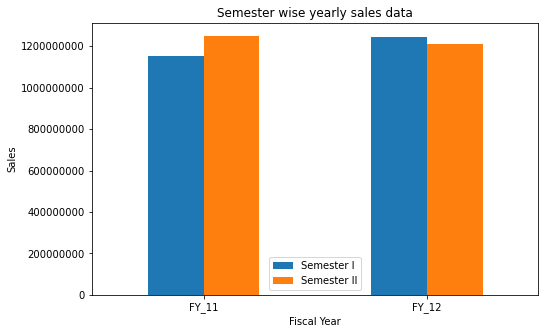

In [12]:
# assign quarter based on date
quarter = lambda x: 1 if x.month in [4,5,6] else 2 if x.month in [7,8,9] else 3 if x.month in [10,11,12] else 4

yearly_sales = wallmart_data
yearly_sales['Quarter'] = yearly_sales.Date.apply(quarter)

# group data by year
fy10_sales = yearly_sales.groupby(wallmart_data.Date.dt.year).get_group(2010)
fy11_sales = yearly_sales.groupby(wallmart_data.Date.dt.year).get_group(2011)
fy12_sales = yearly_sales.groupby(wallmart_data.Date.dt.year).get_group(2012)

# Create quarerly data for each year.
yearly_sales = pd.DataFrame()
yearly_sales['2010'] = fy10_sales.groupby('Quarter')['Weekly_Sales'].sum()
yearly_sales['2011'] = fy11_sales.groupby('Quarter')['Weekly_Sales'].sum()
yearly_sales['2012'] = fy12_sales.groupby('Quarter')['Weekly_Sales'].sum()

# Create semester view.
semester = [[yearly_sales['2010'][1] + yearly_sales['2010'][2], yearly_sales['2010'][3] + yearly_sales['2011'][4]],
           [yearly_sales['2011'][1] + yearly_sales['2011'][2], yearly_sales['2011'][3] + yearly_sales['2012'][4]]]
semester_df = pd.DataFrame(semester,columns=['I','II'],index=["FY_11", "FY_12"], dtype=float)
semester_df.plot(kind='bar', figsize=(8,5))

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title("Semester wise yearly sales data")
plt.xlabel('Fiscal Year')
plt.ylabel('Sales')
plt.legend(["Semester I", "Semester II"])

print("Increase in sales in semester-II FY'11 {0:.2f}".format(
    (semester_df["II"]["FY_11"]-semester_df["I"]["FY_11"])*100/semester_df["II"]["FY_11"]))
print("Decrease in sales in semester-II FY'12 {0:.2f}".format(
    (semester_df["II"]["FY_12"]-semester_df["I"]["FY_12"])*100/semester_df["II"]["FY_12"]))

<h4><li>Semester view of sales in units and give insights</h4>
From the charts it can be clearly seen that in FY'11 a good growth of 7.54% is seen in Semester-II which continued till the first semester of FY'12 and then sales dropped by 2.74%.

Current matplotlib version 3.3.4 doesn't support bar_label


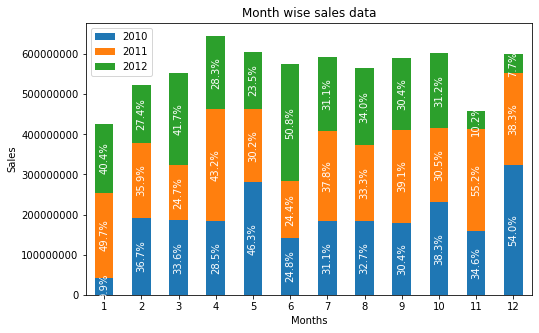

In [13]:
# group data by year
fy10_sales = wallmart_data.groupby(wallmart_data.Date.dt.year).get_group(2010)
fy11_sales = wallmart_data.groupby(wallmart_data.Date.dt.year).get_group(2011)
fy12_sales = wallmart_data.groupby(wallmart_data.Date.dt.year).get_group(2012)

# Create quarerly data for each year.
monthly_sales = pd.DataFrame()
monthly_sales['2010'] = fy10_sales.groupby(fy10_sales.Date.dt.month)['Weekly_Sales'].sum()
monthly_sales['2011'] = fy11_sales.groupby(fy11_sales.Date.dt.month)['Weekly_Sales'].sum()
monthly_sales['2012'] = fy12_sales.groupby(fy12_sales.Date.dt.month)['Weekly_Sales'].sum()
ax = monthly_sales.plot(kind="bar", figsize=(8,5),stacked=True, rot=0, xlabel='Months', ylabel='Sales', title="Month wise sales data")

# plot properties
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

try:
    ax.bar_label(ax.containers[0], label_type='edge')
except AttributeError:
    import matplotlib as mtpltlib
    print("Current matplotlib version " + str(mtpltlib.__version__) + " doesn't support bar_label")
    df_total = monthly_sales["2010"] + monthly_sales["2011"] + monthly_sales["2012"]
    df_rel = monthly_sales[monthly_sales.columns[0:]].div(df_total, 0)*100

    for n in df_rel:
        for i, (cs, ab, pc) in enumerate(zip(monthly_sales.iloc[:, 0:].cumsum(1)[n], 
                                             monthly_sales[n], df_rel[n])):
            plt.text(x = i, y = cs-ab/2, s=str(np.round(pc, 1)) + '%', va = 'center', ha = 'center', 
                     color='w', rotation='vertical', weight='medium')

<h4><li>Provide monthly view of sales in units and give insights</h4>
Above chart depicts the monthly sales distribution for 3 years i.e. 2010, 2011 and 2012. 
<li> Sales observed in the month of April(4) are relatively high followed by May(5) and October(10).
<li> The sales for the month of April are high during the year 2011 and similar in 2010 and 2012.
<li> The sales in month of Jan and November are relatively low with highest percentage of sales recorded during 2012.
<li> Majority of sales are distributed in 2011 and 2010 except for month of June(6) where majority distribution is in FY 2012.

<h4>Holidays impact on sales</h4> 

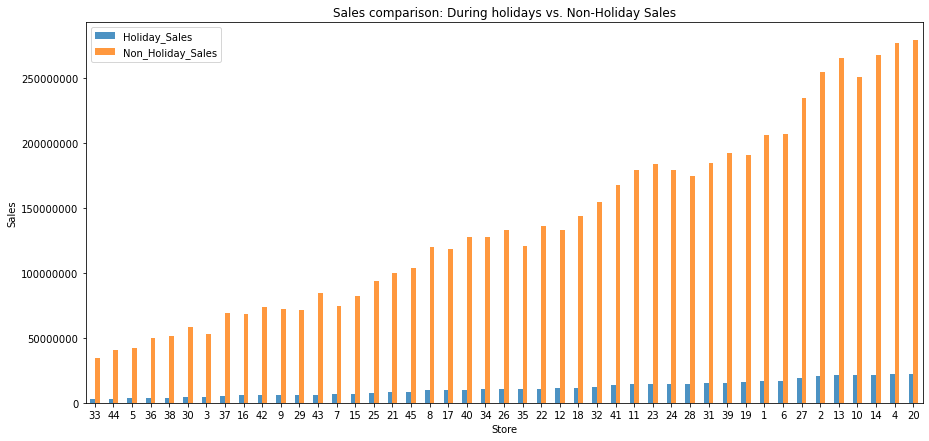

In [14]:
# sales comparison: sales during holidays vs non-holiday sales.

# get all holidays data.
holidays_data = wallmart_data[wallmart_data.Holiday_Flag == 1]
stores_sales = pd.DataFrame(wallmart_data.groupby(wallmart_data.Store)['Weekly_Sales'].sum())
stores_sales['Holiday_Sales'] = holidays_data.groupby(holidays_data.Store)['Weekly_Sales'].sum()

# get all non holidays data.
stores_sales['Non_Holiday_Sales'] = wallmart_data[wallmart_data.Holiday_Flag == 0].groupby(wallmart_data.Store)['Weekly_Sales'].sum()

# plot sales
ax = stores_sales.sort_values(by='Holiday_Sales').iloc[:,1:].plot(kind='bar', figsize=(15,7), alpha=0.8, rot=0, 
                           title='Sales comparison: During holidays vs. Non-Holiday Sales', 
                           xlabel='Store', ylabel='Sales')

# plot properties
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

From above chart it's clear that the store with maximum sales i.e. store 20 have higest number of sales non holiday sales.

Sales during given <b>Holiday Events:</b>
<li>Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
<li>Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
<li>Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
<li>Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

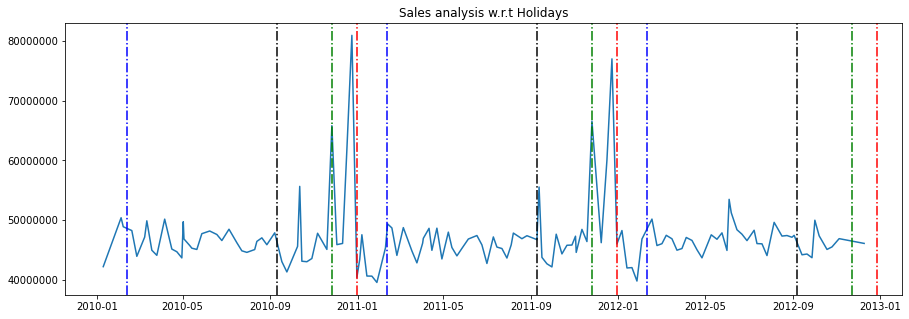

In [15]:
from datetime import datetime
total_sales = wallmart_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

super_bowl =['12-2-2010', '11-2-2011', '10-2-2012']
labour_day =  ['10-9-2010', '9-9-2011', '7-9-2012']
thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(total_sales['Date'], total_sales['Weekly_Sales'])

for day in super_bowl:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day, linestyle='-.', c='b')

for day in labour_day:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day, linestyle='-.', c='black')
    
for day in thanksgiving:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day, linestyle='-.', c='g')
    
for day in christmas:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day, linestyle='-.', c='r')
    
plt.title('Sales analysis w.r.t Holidays')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

In [16]:
# holiday sales.
holiday_sales_data = pd.DataFrame(wallmart_data[wallmart_data.Date.isin(super_bowl)].groupby(wallmart_data.Date.dt.year)['Weekly_Sales'].sum())
holiday_sales_data.rename(columns={'Weekly_Sales':'Super_Bowl'}, inplace=True)
holiday_sales_data['Labour_Day'] = wallmart_data[wallmart_data.Date.isin(labour_day)].groupby(wallmart_data.Date.dt.year)['Weekly_Sales'].sum()
holiday_sales_data['Thanksgiving'] = wallmart_data[wallmart_data.Date.isin(thanksgiving)].groupby(wallmart_data.Date.dt.year)['Weekly_Sales'].sum()
holiday_sales_data['Christmas'] = wallmart_data[wallmart_data.Date.isin(christmas)].groupby(wallmart_data.Date.dt.year)['Weekly_Sales'].sum()
holiday_sales_data

,Super_Bowl,Labour_Day,Thanksgiving,Christmas
Date,,,,
2010,48336677.63,45634397.84,65821003.24,40432519.00
2011,47336192.79,46763227.53,66593605.26,46042461.04
2012,50009407.92,48330059.31,NaN,NaN


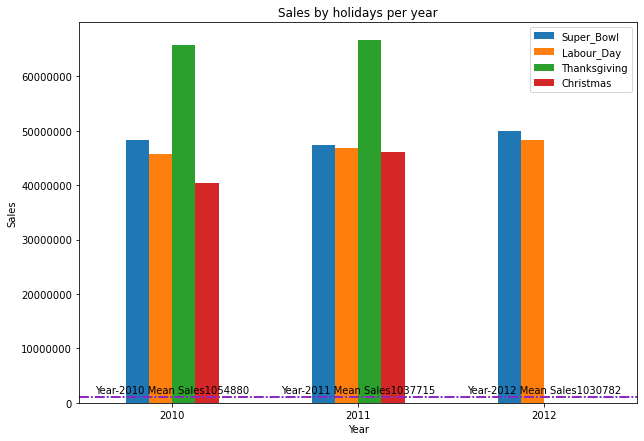

In [17]:
# fill Nan values with 0.
holiday_sales_data.fillna(0, inplace = True)

# plot data
ax = holiday_sales_data.plot(kind='bar', figsize=(10,7), xlabel='Year', ylabel='Sales', title='Sales by holidays per year', 
                             rot=0, stacked=False)
def plot_mean(mean_sales, x_label, color, label):
    plt.axhline(y = mean_sales, color = color, linestyle = '-.')
    plt.text(x = x_label, y = mean_sales * 2.3, s=label+ " Mean Sales" + str(mean_sales), va = 'center', ha = 'center', 
                     color='k', weight='medium')
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    
# plot mean sales for year 2010
plot_mean(round(fy10_sales[fy10_sales.Holiday_Flag == 0]['Weekly_Sales'].mean()), 0, 'b', "Year-2010")

# plot mean sales for year 2011
plot_mean(round(fy11_sales[fy11_sales.Holiday_Flag == 0]['Weekly_Sales'].mean()), 1, 'c', "Year-2011")

# plot mean sales for year 2011
plot_mean(round(fy12_sales[fy12_sales.Holiday_Flag == 0]['Weekly_Sales'].mean()), 2, 'm', "Year-2012")

plt.show()

<h4><li>Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together</h4>
From both the graphs, below conclusions can be drawn -
<li> Sales increase on the day of thanksgiving holidays.</li>
<li> A relative decrease in sales can be seen during Super Bowl and Labor Day.</li>
<li> In between thanksgiving and christmas holidays, rise in the sales can be seen. We can say, pre-christmas sales increase heavily but same is not the case on the day of christmas holidays, as people are busy spending time with there loved ones.</li>
<li> For all the holiday sales in particular year, the sales are much higher than the average non-holiday sales. Also, the mean non-holiday sales are almost equivalent to each other.</li>

<h3>Statistical Modelling</h3>
<p>For Store 1 – Build  prediction models to forecast demand

<li>Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.</li>
<li>Change dates into days by creating new variable.</li>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
# Get store 1 data
store_1_data = wallmart_data.groupby('Store').get_group(1)
store_1_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,1
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,3
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,3


Data pre-processing :

In [20]:
pd.options.mode.chained_assignment = None 

# add day
store_1_data['Day'] = store_1_data.Date.dt.day_of_week

# encode date.
store_1_data['Date'] = pd.factorize(store_1_data['Date'], sort=True)[0] + 1

# drop date and store columns as its not required 
store_1_data.drop(columns=['Store'], inplace=True, axis=1)
store_1_data = pd.get_dummies(store_1_data, columns = ['Holiday_Flag','Day'])
store_1_data.describe()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday_Flag_0,Holiday_Flag_1,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
count,143.00000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,72.00000,1.555264e+06,68.306783,3.219699,215.996892,7.610420,2.41958,0.930070,0.069930,0.076923,0.062937,0.013986,0.069930,0.671329,0.041958,0.062937
std,41.42463,1.559808e+05,14.250486,0.427313,4.350890,0.383749,1.12220,0.255926,0.255926,0.267406,0.243703,0.117845,0.255926,0.471381,0.201198,0.243703
min,1.00000,1.316899e+06,35.400000,2.514000,210.337426,6.573000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.50000,1.458105e+06,58.265000,2.764500,211.549277,7.348000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.00000,1.534850e+06,69.640000,3.290000,215.459905,7.787000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,107.50000,1.614892e+06,80.485000,3.594000,220.531330,7.838000,3.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,143.00000,2.387950e+06,91.650000,3.907000,223.444251,8.106000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are total 143 records available for store 1 insights are as below:
<li> Store 1 sales varies between 1316899.0 and 2387950.0 with a mean of 1555264.0 and standard deviation of 155980.8.
<li> Most of the observations are for non-holiday sales.</li>
<li> The temperature varies between 35F and 91F</li>
<li> Fuel prices are observed between 210.33 tio 223.44 which has less variation.</li>
<li> Unemployment index ranges between 6.57 to 8.10 with minimum or no standard deviation of 0.38</li>
<li> CPI index ranges between 210 and 223. Mean CPI is 215 with standard deviation of 4.3</li>
<li> Most of the sales are done on Sundays,Saturdays and Thursdays</li>

<AxesSubplot:>

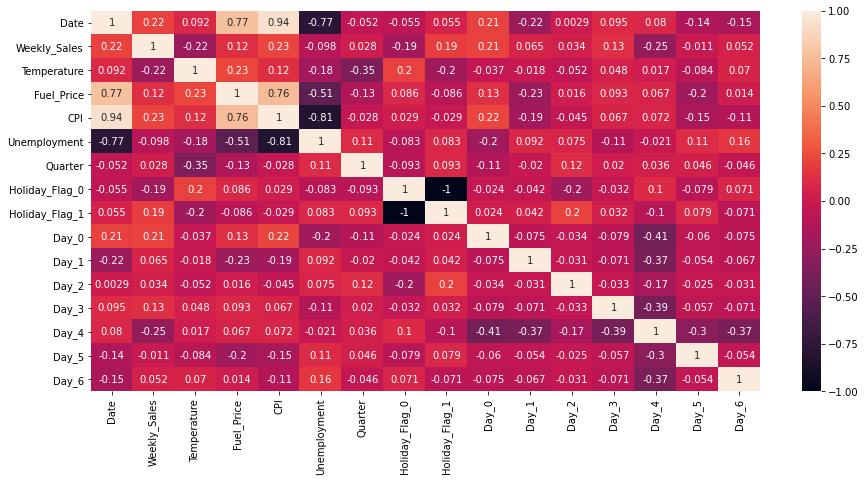

In [21]:
# plot correlation
plt.figure(figsize=(15, 7))
sns.heatmap(store_1_data.corr(), annot=True)

Sales are positively affected by Holidays, Fuel Price(low), CPI, Quarter(low) and Date whereas Temperature is impacting sales negatively and so does days. Fuel Price, CPI and Unemployment are also correlated leading to multicollinearity, this can affect predictions.

In [22]:
store_1_data.columns

Index(['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Quarter', 'Holiday_Flag_0', 'Holiday_Flag_1', 'Day_0',
       'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6'],
      dtype='object')

In [23]:
# Splitting the data into training and testing data
X=store_1_data.drop(['Weekly_Sales', 'Quarter', 'Date'], axis=1)
y=store_1_data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.15, random_state=257)

# train model
model = LinearRegression()
model.fit(X_train, y_train)
print(round(model.score(X_test, y_test)*100))

74


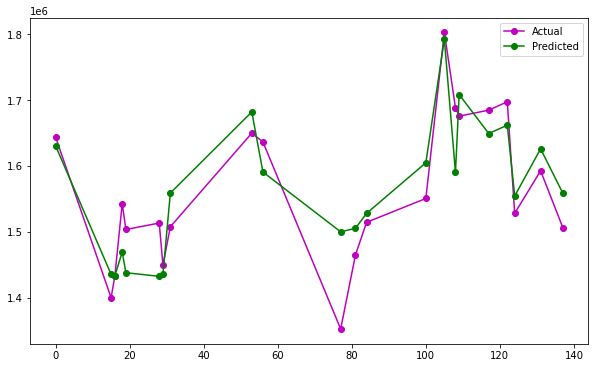

RMSE Score : 3095113683.6658616


In [24]:
# Forecasting
y_pred = model.predict(X_test)

comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison = comparison.sort_index()

#plotting predictions
plt.figure(figsize=(10,6))
plt.plot(comparison.index, comparison.Actual, 'mo-', label='Actual')
plt.plot(comparison.index, comparison.Predicted, 'go-', label='Predicted')
plt.legend()
plt.show()
print('RMSE Score :', mean_squared_error(y_test.values, y_pred))

The model results are 74% accurate. The sales are predicted by ingesting economic factors like CPI, Unemployment Index, etc.